<h1>How are in-demand skills trending for Data Analysts?</h1>

<h3>Methodology</h3>
1.Aggregate skill counts monthly

2.Re-analyze based on percentage of total jobs

3.Plot the monthly skill demand

<h2>Importing Libraries and Data </h2>

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data

from datasets import load_dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleanup

import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_type_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_Ind= df[(df['job_title']=='Data Analyst') & (df['job_country']=='India')].copy()

In [13]:
df_DA_Ind['job_posted_month_no']= df_DA_Ind['job_posted_date'].dt.month
df_DA_Ind_explode= df_DA_Ind.explode('job_skills')

<h3>Creating pivot table</h3>

Create a pivot table from the df_DA_Ind_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [5]:
# Group by month and job_skills
df_DA_Ind_pivot = df_DA_Ind_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_Ind_pivot

job_skills,['alteryx'],"['assembly', 'excel', 'sheets', 'word']","['aws', 'gdpr', 'power bi', 'dax', 'ssrs', 'ssis']","['aws', 'kubernetes', 'terraform', 'docker', 'jira']","['aws', 'redshift', 'power bi', 'looker']","['aws', 'redshift', 'tableau', 'power bi']","['aws', 'tableau']",['aws'],"['azure', 'flow']",['azure'],...,['vba'],"['visual basic', 'mysql', 'excel']","['visual basic', 'vba', 'mysql', 'excel']","['watson', 'oracle', 'ibm cloud']","['windows', 'outlook', 'word', 'excel']","['windows', 'outlook']",['windows'],"['word', 'excel', 'power bi']","['word', 'excel']","['word', 'powerpoint', 'excel', 'visio']"
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


<h3>Sort columns by count and change month numbers to names</h3>

It adds a new row labeled Total that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [7]:
 #sorts by count
df_DA_Ind_pivot.loc['Total'] = df_DA_Ind_pivot.sum()
df_DA_Ind_pivot = df_DA_Ind_pivot[df_DA_Ind_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_Ind_pivot = df_DA_Ind_pivot.drop('Total')

df_DA_Ind_pivot

job_skills,['excel'],"['sql', 'javascript', 'sas', 'sas', 'excel', 'spss']",['sql'],"['sql', 'python', 'r', 'tableau', 'power bi']","['sql', 'excel']","['sql', 'python']",['power bi'],"['sql', 'tableau']","['excel', 'word', 'powerpoint']","['tableau', 'power bi']",...,"['r', 'python', 'sql', 'excel']","['r', 'python', 'sql', 'power bi']","['r', 'sas', 'sas', 'mysql', 'aws', 'azure', 'spss', 'sap']","['r', 'python', 'sql', 'sap', 'power bi', 'tableau', 'excel']","['r', 'python', 'sql', 'sheets']","['r', 'python', 'sql', 'spark']","['r', 'python', 'sql', 'tableau', 'excel']","['r', 'python', 'sql', 'tableau', 'power bi', 'excel']","['r', 'python', 'sql']","['word', 'powerpoint', 'excel', 'visio']"
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,0,2,1,1,2,4,1,...,0,1,0,1,0,0,0,0,0,0
2,4,3,6,0,2,2,0,1,2,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,3,0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,4,3,0,2,0,0,0,0,2,...,0,0,1,0,1,0,0,0,0,0
5,7,2,3,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,4,2,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,3,2,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
8,4,3,5,1,2,1,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
9,5,5,2,2,1,4,0,2,0,1,...,0,0,0,0,0,0,0,0,1,1


<h3>Plotting the Monthly Skill Counts</h3>

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

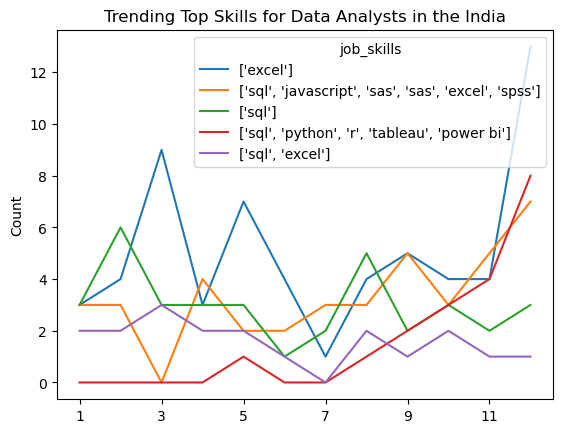

In [9]:
df_DA_Ind_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

Calculates the total number of entries for each month in df_DA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in DA_totals. This is needed to compute the percentages.

In [10]:
# Get monthly totals
DA_totals = df_DA_Ind.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     144
2     118
3      97
4      99
5      64
6      93
7      92
8     141
9     166
10    126
11    204
12    195
dtype: int64

The following code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the df_DA_pivot DataFrame, which contains skill counts, by the monthly totals in DA_totals and multiplying by 100. The new DataFrame, df_DA_pivot_percent, shows skill distributions as percentages of total monthly job entries.

In [11]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_Ind_percent = df_DA_Ind_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_Ind_percent = df_DA_Ind_percent.reset_index()
df_DA_Ind_percent['job_posted_month'] = df_DA_Ind_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Ind_percent = df_DA_Ind_percent.set_index('job_posted_month')
df_DA_Ind_percent = df_DA_Ind_percent.drop(columns='job_posted_month_no')

df_DA_Ind_percent

job_skills,['excel'],"['sql', 'javascript', 'sas', 'sas', 'excel', 'spss']",['sql'],"['sql', 'python', 'r', 'tableau', 'power bi']","['sql', 'excel']","['sql', 'python']",['power bi'],"['sql', 'tableau']","['excel', 'word', 'powerpoint']","['tableau', 'power bi']",...,"['r', 'python', 'sql', 'excel']","['r', 'python', 'sql', 'power bi']","['r', 'sas', 'sas', 'mysql', 'aws', 'azure', 'spss', 'sap']","['r', 'python', 'sql', 'sap', 'power bi', 'tableau', 'excel']","['r', 'python', 'sql', 'sheets']","['r', 'python', 'sql', 'spark']","['r', 'python', 'sql', 'tableau', 'excel']","['r', 'python', 'sql', 'tableau', 'power bi', 'excel']","['r', 'python', 'sql']","['word', 'powerpoint', 'excel', 'visio']"
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,2.083333,2.083333,2.083333,0.000000,1.388889,0.694444,0.694444,1.388889,2.777778,0.694444,...,0.000000,0.694444,0.000000,0.694444,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Feb,3.389831,2.542373,5.084746,0.000000,1.694915,1.694915,0.000000,0.847458,1.694915,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.847458,0.000000,0.00000,0.00000
Mar,9.278351,0.000000,3.092784,0.000000,3.092784,1.030928,0.000000,0.000000,0.000000,1.030928,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Apr,3.030303,4.040404,3.030303,0.000000,2.020202,0.000000,0.000000,0.000000,0.000000,2.020202,...,0.000000,0.000000,1.010101,0.000000,1.010101,0.000000,0.000000,0.000000,0.00000,0.00000
May,10.937500,3.125000,4.687500,1.562500,3.125000,0.000000,1.562500,0.000000,1.562500,1.562500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Jun,4.301075,2.150538,1.075269,0.000000,1.075269,1.075269,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Jul,1.086957,3.260870,2.173913,0.000000,0.000000,0.000000,1.086957,1.086957,1.086957,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.086957,0.000000,0.000000,0.00000,0.00000
Aug,2.836879,2.127660,3.546099,0.709220,1.418440,0.709220,0.709220,0.000000,1.418440,0.709220,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
Sep,3.012048,3.012048,1.204819,1.204819,0.602410,2.409639,0.000000,1.204819,0.000000,0.602410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.60241,0.60241


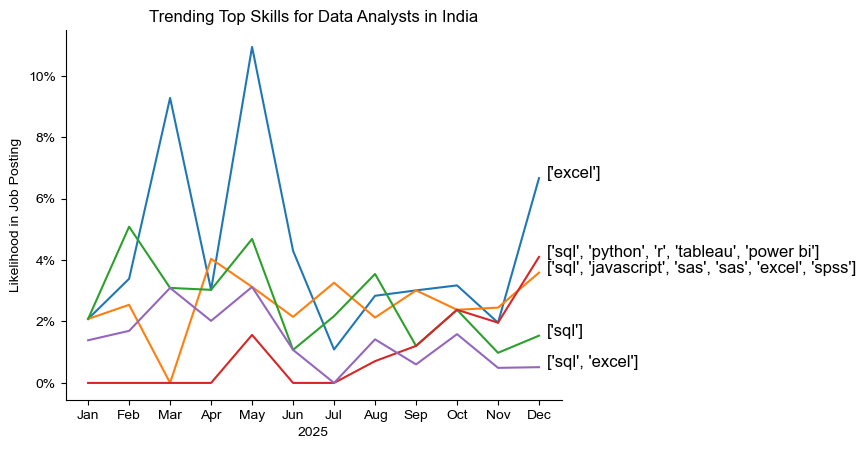

In [12]:
from matplotlib.ticker import PercentFormatter
df_plot = df_DA_Ind_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2025')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()